In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler

In [4]:
# Create a simple toy dataset
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
pass_exam = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

toy_df = pd.DataFrame({
    "hours_studied": hours_studied.flatten(),
    "pass_exam": pass_exam
})

toy_df

,hours_studied,pass_exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1


In [5]:
# Fit logistic regression on the toy dataset
toy_model = LogisticRegression()
toy_model.fit(hours_studied, pass_exam)

print("Intercept (b):", toy_model.intercept_)
print("Coefficient (w):", toy_model.coef_)

Intercept (b): [-5.29559243]
Coefficient (w): [[1.17808562]]


(200, 1)


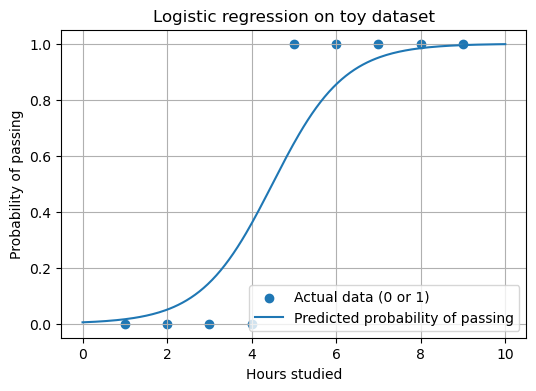

In [6]:
hours_grid = np.linspace(0,10,200).reshape(-1,1) 
print(hours_grid.shape) 
pass_prob = toy_model.predict_proba(hours_grid)[:, 1]

# Plot data points and probability curve
plt.figure(figsize=(6, 4))
plt.scatter(hours_studied, pass_exam, label="Actual data (0 or 1)")
plt.plot(hours_grid, pass_prob, label="Predicted probability of passing")
plt.xlabel("Hours studied")
plt.ylabel("Probability of passing")
plt.title("Logistic regression on toy dataset")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#predict for a few example students
example_hours = np.array([[2],[4],[6],[8]])
example_probs = toy_model.predict_proba(example_hours)[:,1]
print(example_probs)
example_pred = toy_model.predict(example_hours) 
print(example_pred) 
results_df = pd.DataFrame({
    "hours_Studied":example_hours.flatten(),
    "Predicted_Probability_pass":np.round(example_probs,4),
    "Predicted_class":example_pred
})
results_df


[0.05023888 0.35818512 0.85482058 0.98415754]
[0 0 1 1]


,hours_Studied,Predicted_Probability_pass,Predicted_class
0,2,0.0502,0
1,4,0.3582,0
2,6,0.8548,1
3,8,0.9842,1


In [8]:
#sigmoid function 
def sigmoid(z):
    return 1/(1+ np.exp(-z)) 
#check some values 
z_values = np.array([-5,-2,-1,0,1,2,3,4,5],dtype = float)
sig_values = sigmoid(z_values) 

sig_df = pd.DataFrame({
    "z":z_values,
    "sigmoid(z)": np.round(sig_values,4) 
})
sig_df

,z,sigmoid(z)
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,3.0,0.9526
7,4.0,0.9820
8,5.0,0.9933


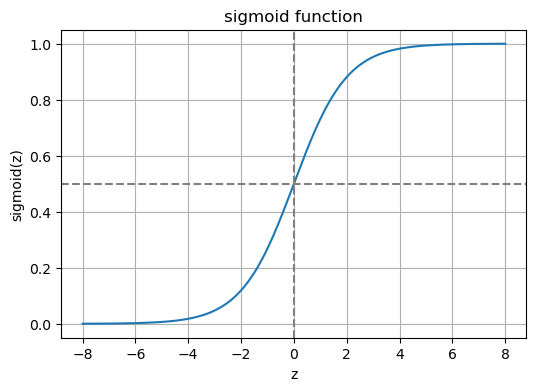

In [9]:
z_grid = np.linspace(-8,8,400)
sig_grid = sigmoid(z_grid)

# Plot data points and probability curve
plt.figure(figsize=(6, 4)) 
plt.plot(z_grid,sig_grid)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("sigmoid function") 
plt.axhline(0.5,color="gray",linestyle="--")
plt.axvline(0,color="gray",linestyle="--")
plt.grid(True)
plt.show()

In [10]:
data = load_breast_cancer()
X_full = data.data 
y_full = data.target 

print("Feature matrix shape: ",X_full.shape) 
print("Target shape:",y_full.shape) 
print("Classes: ",data.target_names)

Feature matrix shape:  (569, 30)
Target shape: (569,)
Classes:  ['malignant' 'benign']


In [11]:
feature_names = data.feature_names 
df = pd.DataFrame(X_full,columns = feature_names) 
df["target"] = y_full 
df.head(10) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [12]:
df.describe().T.head(15)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.37000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.84000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.24000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.10000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.09587,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.09263,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.06154,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.03350,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.17920,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.06154,0.066120,0.09744


In [13]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [14]:
#Train test split 
X_train,X_test,y_train,y_test = train_test_split(
    X_full,y_full,test_size=0.2,random_state=42,stratify=y_full
)
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 

In [15]:
#Train logistic regression on the scaled data 
clf = LogisticRegression(max_iter=100) 
clf.fit(X_train_scaled,y_train)

y_test_pred = clf.predict(X_test_scaled)  
y_test_proba = clf.predict_proba(X_test_scaled)[:,1]  
print("Test Accuracy:",accuracy_score(y_test,y_test_pred)) 


Test Accuracy: 0.9824561403508771


In [16]:
#Confusion matrix and classification report
cm = confusion_matrix(y_test,y_test_pred)

print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[41  1]
 [ 1 71]]


In [17]:
print("\nClassification report:\n",classification_report(y_test,y_test_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



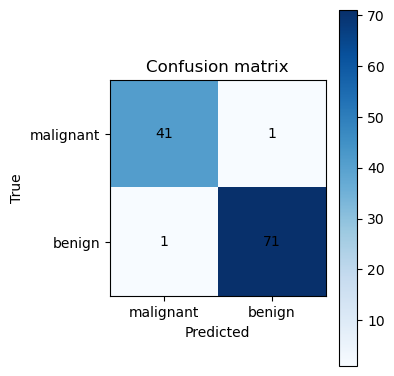

In [18]:
# Visual confusion matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion matrix")
plt.colorbar()
tick_labels = data.target_names
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [19]:
#Basic metrics at default threshold o.5
acc = accuracy_score(y_test,y_test_pred) 
prec = precision_score(y_test,y_test_pred) 
rec = recall_score(y_test,y_test_pred)  
f1 = f1_score(y_test,y_test_pred)  

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 score: 0.9861111111111112


In [35]:

# Try different thresholds and see how precision and recall change
thresholds = np.linspace(0.1, 0.9, 9)#0.1,0.2,0.3,0.4...
rows = []

for thr in thresholds:
    y_thr_pred = (y_test_proba >= thr).astype(int)
    acc_thr = accuracy_score(y_test, y_thr_pred)
    prec_thr = precision_score(y_test, y_thr_pred)
    rec_thr = recall_score(y_test, y_thr_pred)
    f1_thr = f1_score(y_test, y_thr_pred)
    rows.append([thr, acc_thr, prec_thr, rec_thr, f1_thr])

thr_df = pd.DataFrame(rows, columns=["threshold", "accuracy", "precision", "recall", "f1"])
thr_df

,threshold,accuracy,precision,recall,f1
0,0.1,0.947368,0.923077,1.000000,0.960000
1,0.2,0.964912,0.947368,1.000000,0.972973
2,0.3,0.982456,0.972973,1.000000,0.986301
3,0.4,0.982456,0.972973,1.000000,0.986301
4,0.5,0.982456,0.986111,0.986111,0.986111
5,0.6,0.973684,0.985915,0.972222,0.979021
6,0.7,0.956140,0.985507,0.944444,0.964539
7,0.8,0.947368,0.985294,0.930556,0.957143
8,0.9,0.929825,0.984848,0.902778,0.942029


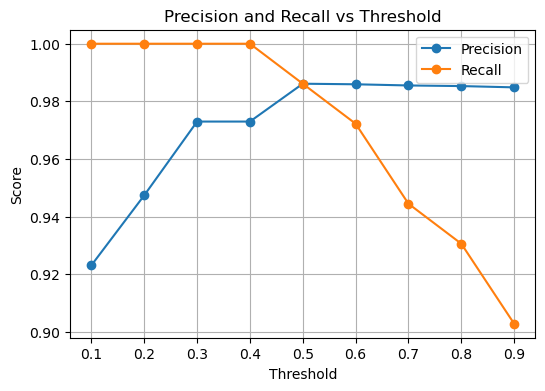

In [37]:

# Plot precision and recall vs threshold
plt.figure(figsize=(6, 4))
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.grid(True)
plt.legend()
plt.show()

In [38]:
# Two models with different regularization strengths
clf_weak_reg = LogisticRegression(max_iter=100, C=1000.0) #Weak regularixation
clf_strong_reg = LogisticRegression(max_iter=100, C=0.01) #Strong regularixation

clf_weak_reg.fit(X_train_scaled,y_train)
clf_strong_reg.fit(X_train_scaled,y_train)

y_pred_weak = clf_weak_reg.predict(X_test_scaled)
y_pred_strong = clf_strong_reg.predict(X_test_scaled)

print("Weak reg (C=1000) test accuracy: ", accuracy_score(y_test, y_pred_weak))
print("Strong reg (C=0.01) test accuracy: ", accuracy_score(y_test, y_pred_strong))
     

Weak reg (C=1000) test accuracy:  0.956140350877193
Strong reg (C=0.01) test accuracy:  0.956140350877193


In [41]:
#compare coefficient magnitudes 
coef_weak = clf_weak_reg.coef_[0]
coef_strong = clf_strong_reg.coef_[0]
coef_df = pd.DataFrame({
    "feature":feature_names, 
    "coef_weak_C_1000":coef_weak, 
    "coef_strong_C_0.01":coef_strong
})
coef_df.head(15)

,feature,coef_weak_C_1000,coef_strong_C_0.01
0,mean radius,6.963022,-0.212316
1,mean texture,-7.053055,-0.180606
2,mean perimeter,3.203032,-0.209968
3,mean area,-3.070363,-0.196291
4,mean smoothness,-5.270183,-0.102438
5,mean compactness,30.138925,-0.098428
6,mean concavity,-9.979292,-0.149764
7,mean concave points,-6.621755,-0.206900
8,mean symmetry,0.293821,-0.080873
9,mean fractal dimension,-7.435442,0.079728


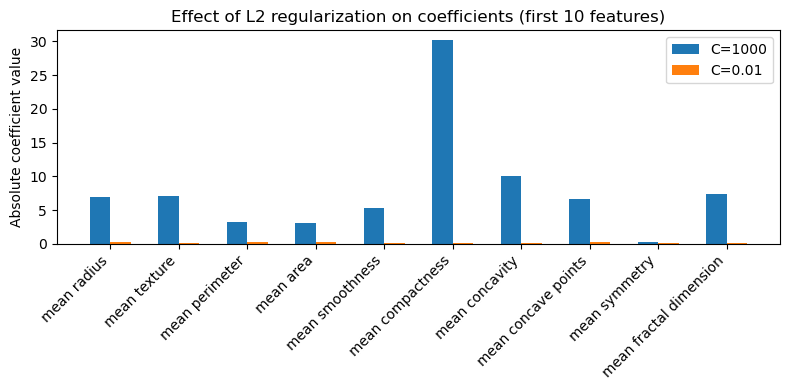

In [44]:

# Plot absolute values for the first 10 coefficients
n_plot = 10
indices = np.arange(n_plot)

plt.figure(figsize=(8, 4))
plt.bar(indices - 0.15, np.abs(coef_weak[:n_plot]), width=0.3, label="C=1000")
plt.bar(indices + 0.15, np.abs(coef_strong[:n_plot]), width=0.3, label="C=0.01")
plt.xticks(indices, feature_names[:n_plot], rotation=45, ha="right")
plt.ylabel("Absolute coefficient value")
plt.title("Effect of L2 regularization on coefficients (first 10 features)")
plt.legend()
plt.tight_layout()
plt.show()